In [1]:
%matplotlib notebook
import pandas as pd
import pathlib as path
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hvplot.pandas
import datetime as dt
import seaborn as sns
from config import api_key
from pprint import pprint
from sklearn.linear_model import LinearRegression
import certifi
import json

In [2]:
# import data for Dollarama, Canadian_tire, and Linamar companies.

Dollarama_balance_sheet=pd.read_csv("Resource/Dollarama_balance_sheet.csv")
Dollarama_income_statement = pd.read_csv("Resource/Dollarama_income_tatement.csv")
Dollarama_cash_flow_statement = pd.read_csv("Resource/Dollarama_cash_flow_statement.csv")

Canadian_tire_balance_sheet = pd.read_csv("Resource/Canadian_tire_balance_sheet.csv")
Canadian_tire_income_statement = pd.read_csv("Resource/Canadian_tire_income_statement.csv")
Canadian_tire_cash_flow_statement = pd.read_csv("Resource/Canadian_tire_cash_flow_statement.csv")

Linamar_balance_sheet = pd.read_csv("Resource/Linamar_balance_sheet.csv")
Linamar_income_statement = pd.read_csv("Resource/Linamar_income_statement.csv")
Linamar_cash_flow_statement = pd.read_csv("Resource/Linamar_income_statement.csv")


In [3]:
#Dollarama_balance_sheet.head(10)
#Dollarama_income_statement.head(10)
#Dollarama_cash_flow_statement.head(10)

#Canadian_tire_balance_sheet.head(10)
#Canadian_tire_income_statement.head(10)
#Canadian_tire_cash_flow_statement.head(10)

#Linamar_balance_sheet.head(10)
#Linamar_income_statement.head(10)
Linamar_cash_flow_statement.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Linamar Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premium Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Income Statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FY-9,FY-8,FY-7,FY-6,FY-5,FY-4,FY-3,FY-2,FY-1,FY
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Period End Date,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rename the columns.
Dollarama_balance_sheet=Dollarama_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_income_statement = Dollarama_income_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})


Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.rename(columns=        
         { "Canadian Tire Corporation Limited": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_income_statement = Canadian_tire_income_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_balance_sheet = Linamar_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_income_statement = Linamar_income_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_cash_flow_statement = Linamar_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

In [5]:
# For test
#Dollarama_balance_sheet.head(10)
#Dollarama_income_statement.head(10)
#Dollarama_cash_flow_statement.head(10)

#Canadian_tire_balance_sheet.head(10)
#Canadian_tire_income_statement.head(10)
#Canadian_tire_cash_flow_statement.head(10)

#Linamar_balance_sheet.head(10)
#Linamar_income_statement.head(10)
# Linamar_cash_flow_statement.head(10)

In [6]:
# Clean data for Dollarama
Dollarama_balance_sheet = Dollarama_balance_sheet.loc[Dollarama_balance_sheet["Dollarama"] != 'Period End Date']
Dollarama_balance_sheet = Dollarama_balance_sheet.dropna(how='any')
Dollarama_balance_sheet = Dollarama_balance_sheet.set_index("Dollarama")


Dollarama_income_statement = Dollarama_income_statement.loc[Dollarama_income_statement["Dollarama"] != 'Period End Date']
Dollarama_income_statement = Dollarama_income_statement.dropna(how='any')
Dollarama_income_statement = Dollarama_income_statement.set_index("Dollarama")


Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.loc[Dollarama_cash_flow_statement["Dollarama"] != 'Period End Date']
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.dropna(how='any')
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.set_index("Dollarama")


# Clean data for Canadian_tire
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.loc[Canadian_tire_balance_sheet["Canadian Tire"] != 'Period End Date']
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.dropna(how='any')
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.set_index("Canadian Tire")


Canadian_tire_income_statement = Canadian_tire_income_statement.loc[Canadian_tire_income_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_income_statement = Canadian_tire_income_statement.dropna(how='any')
Canadian_tire_income_statement = Canadian_tire_income_statement.set_index("Canadian Tire")



Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.loc[Canadian_tire_cash_flow_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.dropna(how='any')
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.set_index("Canadian Tire")



# Clean data for Canadian_tire
Linamar_balance_sheet = Linamar_balance_sheet.loc[Linamar_balance_sheet["Linamar"] != 'Period End Date']
Linamar_balance_sheet = Linamar_balance_sheet.dropna(how='any')
Linamar_balance_sheet = Linamar_balance_sheet.set_index("Linamar")


Linamar_income_statement = Linamar_income_statement.loc[Linamar_income_statement["Linamar"] != 'Period End Date']
Linamar_income_statement = Linamar_income_statement.dropna(how='any')
Linamar_income_statement = Linamar_income_statement.set_index("Linamar")


Linamar_cash_flow_statement = Linamar_cash_flow_statement.loc[Linamar_cash_flow_statement["Linamar"] != 'Period End Date']
Linamar_cash_flow_statement = Linamar_cash_flow_statement.dropna(how='any')
Linamar_cash_flow_statement = Linamar_cash_flow_statement.set_index("Linamar")


In [7]:
# Convert rows to columns and vice versa
#for dollarama
Dollarama_balance_sheet_df = Dollarama_balance_sheet.transpose()
Dollarama_income_statement_df = Dollarama_income_statement.transpose()
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement.transpose()
#for canadian tire
Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet.transpose()
Canadian_tire_income_statement_df = Canadian_tire_income_statement.transpose()
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement.transpose()
#for linamar
Linamar_balance_sheet_df = Linamar_balance_sheet.transpose()
Linamar_income_statement_df = Linamar_income_statement.transpose()
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement.transpose()


In [8]:
def convert_to_float(value):
    try:
        # Replace non-numeric characters and convert to float
        return float(value.replace('%', '').replace(',', ''))
    except ValueError:
        # Handle errors, e.g., if the value is already numeric or contains unexpected characters
        return value

# Apply the conversion function to the entire DataFrame
#for dollarama company
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement_df.applymap(convert_to_float)
Dollarama_income_statement_df = Dollarama_income_statement_df.applymap(convert_to_float)
Dollarama_balance_sheet_df = Dollarama_balance_sheet_df.applymap(convert_to_float)
#for canadian tire company
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement_df.applymap(convert_to_float)
Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet_df.applymap(convert_to_float)
Canadian_tire_income_statement_df = Canadian_tire_income_statement_df.applymap(convert_to_float)
#for liarma company
Linamar_balance_sheet_df = Linamar_balance_sheet_df.applymap(convert_to_float)
Linamar_income_statement_df = Linamar_income_statement_df.applymap(convert_to_float)
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement_df.applymap(convert_to_float)


In [9]:
# Calculating the financial ratios
# Liquidity Ratios
# 1-Working capital ratio = Current assets / Current liabilities

# 2-Quick Ratio = Current assets – (Inventories / Current liabilities)
# 3-Operating cash flow ratio = Operating cash flow / Current liabilities


In [10]:
#Risk Analysis Ratios
# 1-Debt to equity ratio = Total liabilities / Shareholder’s equity
# 2-Cash flow to debt ratio = Operating Cash Flow / Total Debt
# 3-Interest coverage ratio = Operating income / Interest expenses

In [11]:
# Efficiency Ratios
# 1-Inventory turnover ratio = Cost of goods / Average inventory
# 2-Working capital turnover ratio = Net Sales / Average Working Capital
# 3-Asset Turnover Ratio = Net Sales / Total Assets


In [12]:
# Other Ratios
# 1- P/E Ratio= Market Price per Share / Earnings per Share (EPS)
# 2- Dividend Per Share


In [13]:
# apikey = config.api_key
# api_key= LKG35AP5EYL6YUIJ
# base_url = https://www.alphavantage.co/query?
# parameter = function=TIME_SERIES_DAILY&
# sympole = symbol=SHOP.
# api_key = TRT&outputsize=full&apikey=demo
# combined_url = 
# pprint(combined_url)



Profitability Ratios

In [14]:
# creat DataFrame for Dollarama:
columns = ["Ticker", "Gross Profit Margin", "Net profit margin","Return On Equity (ROE)","EPS"]

Dollarama_ratios_df = pd.DataFrame(columns=columns)
Dollarama_ratios_df

# creat DataFrame for canadian tire:
columns = ["Ticker", "Gross Profit Margin", "Net profit margin","Return On Equity (ROE)","EPS" ]

Canadian_tire_ratios_df = pd.DataFrame(columns=columns)
Canadian_tire_ratios_df

# creat DataFrame for linamar:
columns = ["Ticker", "Gross Profit Margin", "Net profit margin","Return On Equity (ROE)","EPS"]

Linamar_ratios_df = pd.DataFrame(columns=columns)
Linamar_ratios_df

,Ticker,Gross Profit Margin,Net profit margin,Return On Equity (ROE),EPS


In [15]:
# 1-Gross Progit Margin = (Revenue - Cost of sale / Revenue) * 100
Dollarama_ratios_df["Gross Profit Margin"] = ((Dollarama_income_statement_df["Revenue"] + Dollarama_income_statement_df["Cost of Revenues"]) / Dollarama_income_statement_df["Revenue"])*100
Canadian_tire_ratios_df["Gross Profit Margin"] = ((Canadian_tire_income_statement_df["Revenue"] + Canadian_tire_income_statement_df["Cost of Revenues"]) / Canadian_tire_income_statement_df["Revenue"])*100
Linamar_ratios_df["Gross Profit Margin"] = ((Linamar_income_statement_df["Revenue"] + Linamar_income_statement_df["Cost of Revenues"]) / Linamar_income_statement_df["Revenue"])*100
gross_profit_combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])
gross_profit_combined_df

,Ticker,Gross Profit Margin,Net profit margin,Return On Equity (ROE),EPS
2014,NaN,46.967515,NaN,NaN,NaN
2015,NaN,46.676921,NaN,NaN,NaN
2016,NaN,48.643130,NaN,NaN,NaN
2017,NaN,48.594012,NaN,NaN,NaN
2018,NaN,48.998007,NaN,NaN,NaN
2019,NaN,48.201368,NaN,NaN,NaN
2020,NaN,47.141189,NaN,NaN,NaN
2021,NaN,47.478962,NaN,NaN,NaN
2022,NaN,47.311939,NaN,NaN,NaN
2023,NaN,46.528270,NaN,NaN,NaN


In [16]:
# 2-Net profit margin = Net income / Sales
Dollarama_ratios_df["Net profit margin"] = Dollarama_income_statement_df["Net Income to Stockholders"] / Dollarama_income_statement_df["Revenue"]
Canadian_tire_ratios_df["Net profit margin"] = Canadian_tire_income_statement_df["Net Income to Stockholders"] / Canadian_tire_income_statement_df["Revenue"]
Linamar_ratios_df["Net profit margin"] = Linamar_income_statement_df["Net Income to Stockholders"] / Linamar_income_statement_df["Revenue"]

In [17]:
# 3-Return On Equity (ROE) = Net income / Shareholder’s equity
Dollarama_ratios_df["Return On Equity (ROE)"] = Dollarama_income_statement_df["Net Income to Stockholders"] / Dollarama_balance_sheet_df["Total Equity"]
Canadian_tire_ratios_df["Return On Equity (ROE)"] = Canadian_tire_income_statement_df["Net Income to Stockholders"] / Canadian_tire_balance_sheet_df["Total Equity"]
Linamar_ratios_df["Return On Equity (ROE)"] = Linamar_income_statement_df["Net Income to Stockholders"] / Linamar_balance_sheet_df["Total Equity"]

In [18]:

# 4-EPS = (Net income - Preferred dividends) / Average common shares outstanding
Dollarama_ratios_df["EPS"] = Dollarama_income_statement_df["Basic EPS (Cont. Ops)"]
Canadian_tire_ratios_df["EPS"] = Canadian_tire_income_statement_df["Basic EPS (Cont. Ops)"]
Linamar_ratios_df["EPS"] = Linamar_income_statement_df["Basic EPS (Cont. Ops)"]

In [19]:
Dollarama_ratios_df["Ticker"] = "DOL"
Dollarama_ratios_df = Dollarama_ratios_df.drop(Dollarama_ratios_df.index[9]).reset_index(drop=False)


Canadian_tire_ratios_df["Ticker"] = "CTC"
Canadian_tire_ratios_df = Canadian_tire_ratios_df.drop(Canadian_tire_ratios_df.index[0]).reset_index(drop=False)


Linamar_ratios_df["Ticker"] = "LNR"
Linamar_ratios_df = Linamar_ratios_df.drop(Linamar_ratios_df.index[0]).reset_index(drop=False)

In [20]:
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])
combined_df

,index,Ticker,Gross Profit Margin,Net profit margin,Return On Equity (ROE),EPS
0,2014,DOL,46.967515,0.121130,0.289405,0.58
1,2015,DOL,46.676921,0.126742,0.398944,0.74
2,2016,DOL,48.643130,0.145320,0.824985,1.01
3,2017,DOL,48.594012,0.150389,4.443740,1.25
4,2018,DOL,48.998007,0.159031,-2.058227,1.54
5,2019,DOL,48.201368,0.153582,-1.717119,1.68
6,2020,DOL,47.141189,0.148929,-6.117825,1.80
7,2021,DOL,47.478962,0.140167,1.685355,1.82
8,2022,DOL,47.311939,0.153130,-10.042842,2.19
0,2014,CTC,30.093317,0.048464,0.107267,7.65


<IPython.core.display.Javascript object>


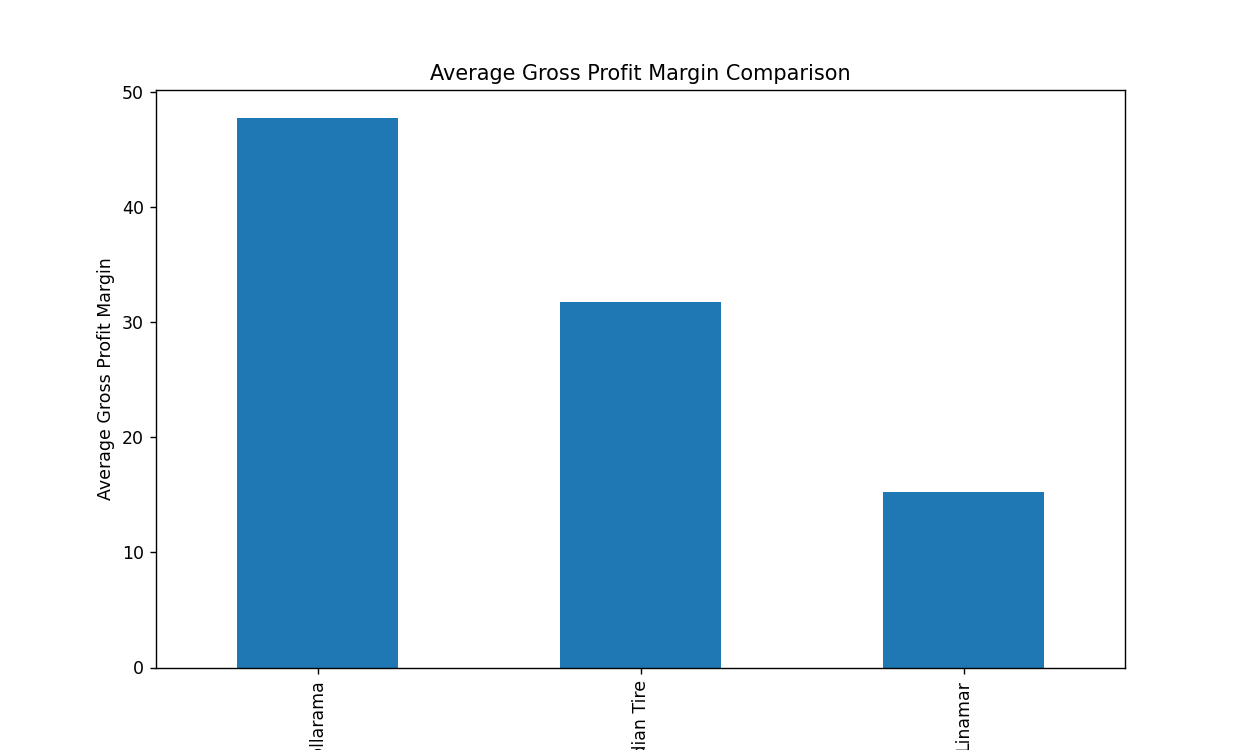

In [21]:
#bar graph for gros margin
combined_df1 = pd.concat([Dollarama_ratios_df['Gross Profit Margin'],
                         Canadian_tire_ratios_df['Gross Profit Margin'],
                         Linamar_ratios_df['Gross Profit Margin']], 
                         axis=1)
combined_df1.columns = ['Dollarama', 'Canadian Tire', 'Linamar']

combined_df1.mean().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Gross Profit Margin')
plt.title('Average Gross Profit Margin Comparison')
plt.show()



<IPython.core.display.Javascript object>


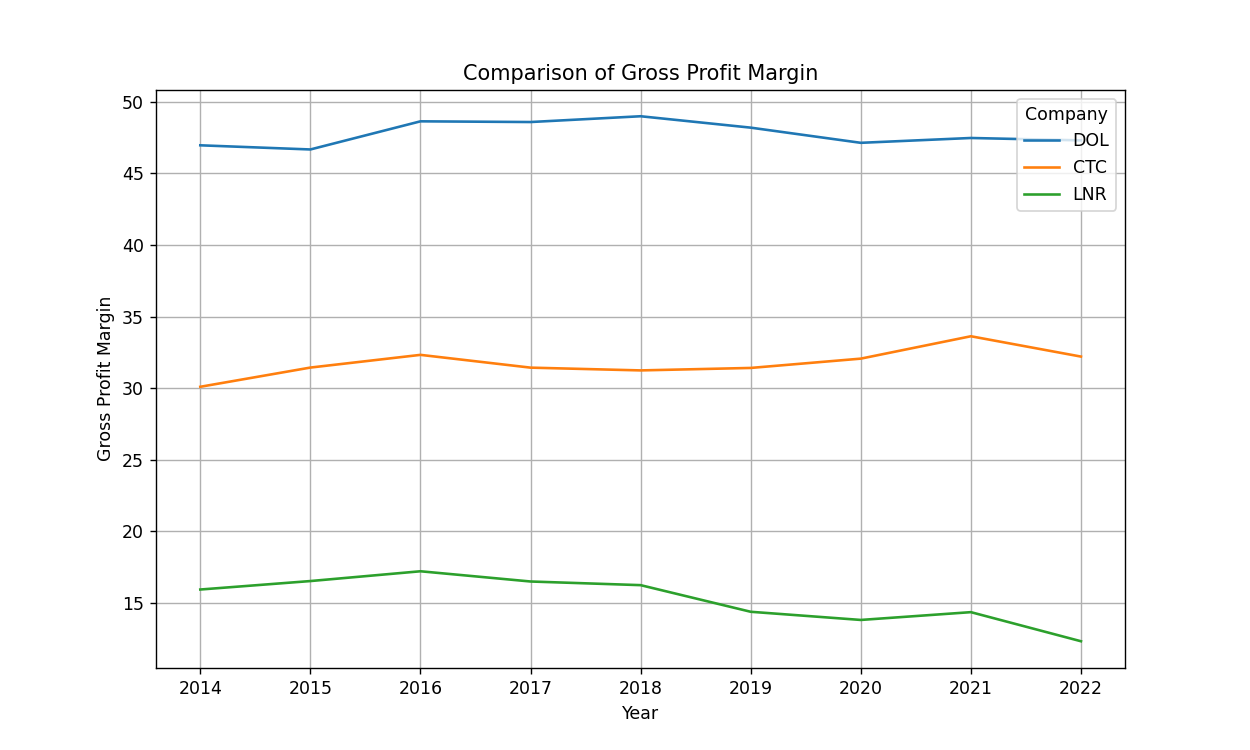

In [22]:
# Filter data for the Gross Profit Margin across the three companies
filtered_df = combined_df[["Ticker", "index", "Gross Profit Margin",'Net profit margin','Return On Equity (ROE)','EPS']]

# Plotting the comparison of Gross Profit Margin
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Gross Profit Margin', hue='Ticker', data=filtered_df)
plt.title('Comparison of Gross Profit Margin')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Gross Profit Margin')
plt.legend(title='Company', loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


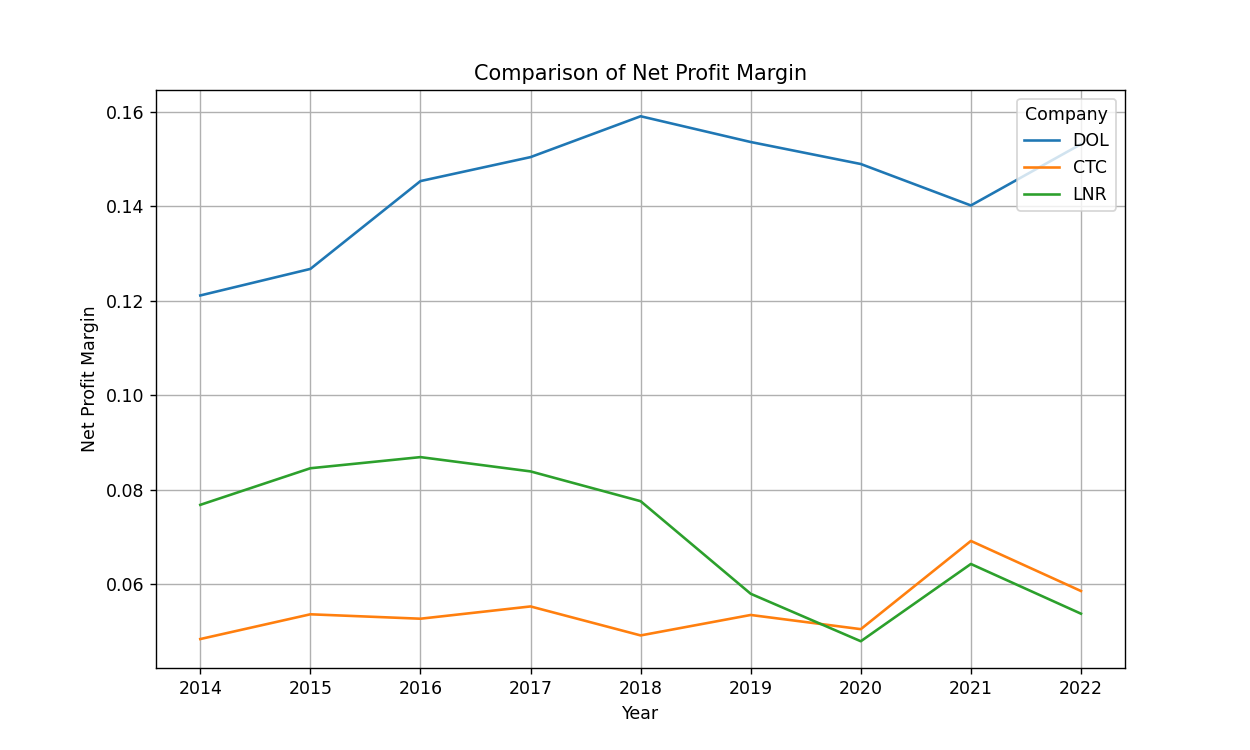

In [23]:
# Plotting the comparison of Net Profit Margin
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Net profit margin', hue='Ticker', data=filtered_df)
plt.title('Comparison of Net Profit Margin')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Net Profit Margin')
plt.legend(title='Company', loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


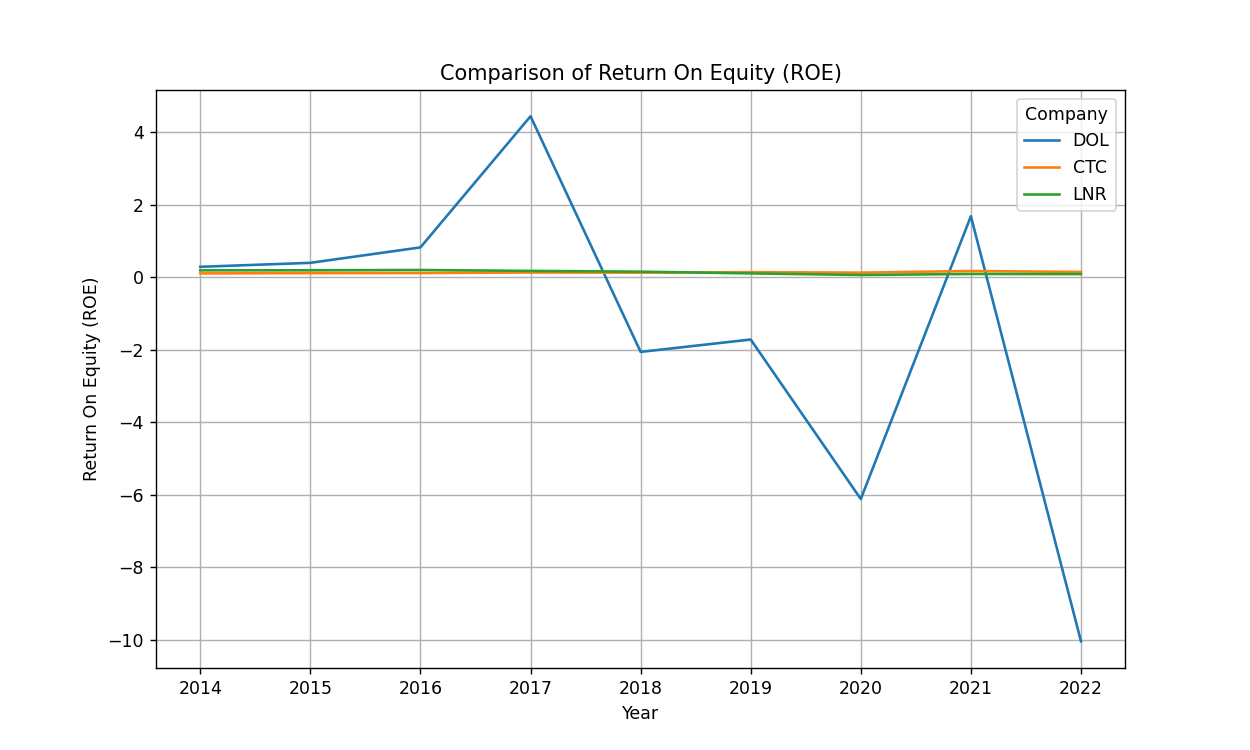

In [24]:
# Plotting the comparison of Return On Equity (ROE)
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Return On Equity (ROE)', hue='Ticker', data=filtered_df)
plt.title('Comparison of Return On Equity (ROE)')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Return On Equity (ROE)')
plt.legend(title='Company', loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


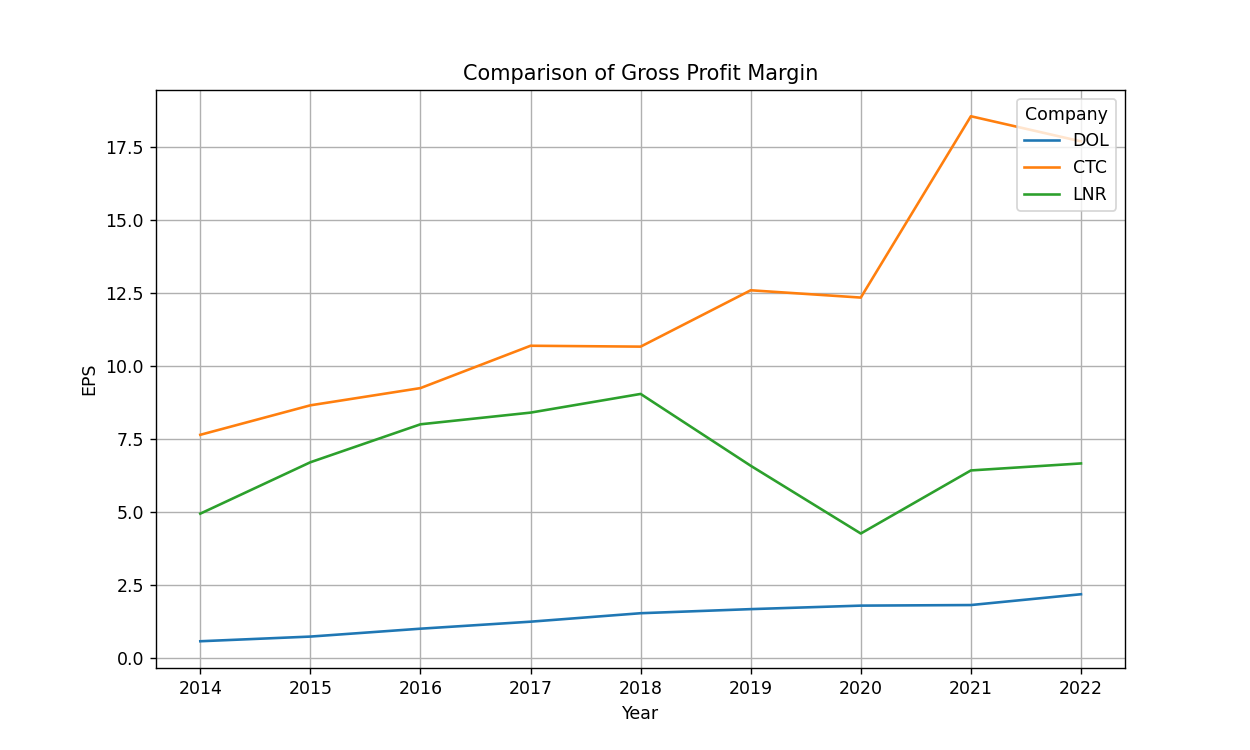

In [25]:
# Plotting the comparison of EPS
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='EPS', hue='Ticker', data=filtered_df)
plt.title('Comparison of Gross Profit Margin')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('EPS')
plt.legend(title='Company', loc='upper right')
plt.show()